In [2]:
using Pkg

In [168]:
Pkg.add("ScikitLearn")
Pkg.add("DataFrames")
Pkg.add("CSV")
Pkg.add("PyCall")
Pkg.add("GaussianMixtures")
Pkg.add("Clustering")
Pkg.add("RDatasets")
Pkg.add("Plots")
Pkg.add("Distances")
Pkg.add("Statistics")
Pkg.add("LinearAlgebra")
Pkg.add("Distances")

  Resolving package versions...
No Changes to `C:\Users\conno\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\conno\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\conno\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\conno\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\conno\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\conno\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\conno\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\conno\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\conno\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\conno\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\conno\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\conno\.julia\environ

In [169]:
using ScikitLearn
using DataFrames
using CSV
using PyCall
using GaussianMixtures
using Clustering
using RDatasets
using Plots
using Distances
using Statistics
using LinearAlgebra
using Distances

In [5]:
@sk_import preprocessing: OneHotEncoder;
@sk_import preprocessing: LabelEncoder;
@sk_import decomposition: PCA;

## This first set of data is using one hot encoding to show the difference between one hot and label encoding. The rest of the assignment after this sectiion will be using label encoding.

## Importing data

In [6]:
df_hot = CSV.File("01_hdp.csv"; header = true) |> DataFrame;

In [7]:
X_hot = convert(Array, df_hot);

## Categorical to numerical data using one hot encoding to avoid derived correlation

In [8]:
onehot_encoder = OneHotEncoder();
onehot_encoded = onehot_encoder.fit_transform(X_hot[:, [12, 13, 14, 15, 24]]);
onehot_encoded = onehot_encoded.toarray();

In [9]:
one_df = DataFrame(onehot_encoded);

In [10]:
df_hot = df_hot[:, Not([12, 13, 14, 15, 24])];

In [11]:
df_hot = [df_hot one_df];

In [12]:
X_hot = convert(Array, df_hot);

## Normalization

In [13]:
for i = 1:1:size(X_hot)[2]
    X_hot[:, i] = normalize(X_hot[:, i]);
end

## PCA to determine most important features for plotting

In [14]:
pca = PCA(n_components=10);
X_pca = pca.fit_transform(X_hot);
df_pca_hot = X_pca |> DataFrame;

## K-means

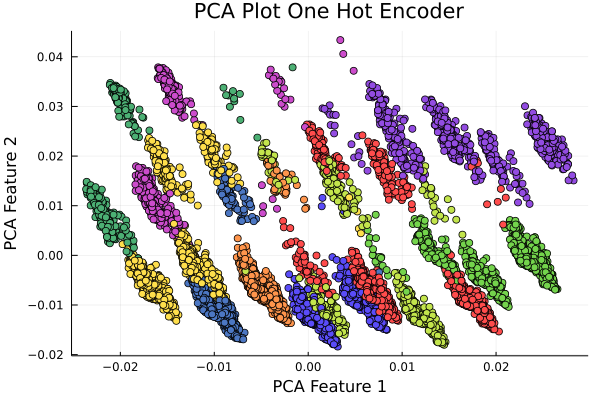

In [256]:
clusters = 10;
features = collect(Matrix(X_hot)');
result = kmeans(features, clusters);

scatter(df_pca_hot.x1, df_pca_hot.x2, marker_z=result.assignments, title = "PCA Plot One Hot Encoder", color=:lightrainbow, legend=false)
xlabel!("PCA Feature 1")
ylabel!("PCA Feature 2")

In [257]:
nclusters(result) == clusters

true

In [258]:
a = assignments(result);
c = counts(result);
M = result.centers |> DataFrame;
println("Total Cost: ", result.totalcost);

Total Cost: 6.430970340794184


In [259]:
distances = pairwise(SqEuclidean(), X_hot');
println("Mean Silhouettes Score (Closer to 1 is better): ", mean(silhouettes(a, c, distances)));

Mean Silhouettes Score (Closer to 1 is better): 0.2600116373447695


In [134]:
sils = silhouettes(a, c, distances)
out_3_vals = sort(sils)[[1,2,3]];
out_3_ind = [];
for i = 1:1:3
    temp = findall(x->x==out_3_vals[i], sils)
    append!(out_3_ind, temp);
end
println("The top three outliers are rows: ", out_3_ind[1]," ",out_3_ind[2]," ",out_3_ind[3], " in the excel file")
println("They are part of clusters: ", a[out_3_ind][1]," ",a[out_3_ind][1], " ",a[out_3_ind][3],  " respectively");

The top three outliers are rows: 3138 3282 6745 in the excel file
They are part of clusters: 3 3 3 respectively


In [135]:
println("The outlier data in the corresponding rows") 
show(df_label[out_3_ind, :])

The outlier data in the corresponding rows
3×27 DataFrame
 Row │ tumorsize  co2      pain   wound  mobility  ntumors  nmorphine  remissi ⋯
     │ Float64    Float64  Int64  Int64  Int64     Int64    Int64      Int64   ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │   60.3783  1.38954      4      5         5        5          2          ⋯
   2 │   65.6523  1.61908      7      9         6        5          4
   3 │   70.2839  1.437        6      5         5        4          3
                                                              20 columns omitted

## The rest of this assignment will use the data from label encoding below

## Importing data

In [150]:
df_label = CSV.File("01_hdp.csv"; header = true) |> DataFrame;

In [151]:
X_label = convert(Array, df_label);

## Categorical to numerical data using label encoding

In [152]:
label_encoder = LabelEncoder();
label_encoded1 = label_encoder.fit_transform(X_label[:, 12]);
label_encoded2 = label_encoder.fit_transform(X_label[:, 13]);
label_encoded3 = label_encoder.fit_transform(X_label[:, 14]);
label_encoded4 = label_encoder.fit_transform(X_label[:, 15]);
label_encoded5 = label_encoder.fit_transform(X_label[:, 24]);

In [153]:
df_label.FamilyHx = label_encoded1;
df_label.SmokingHx = label_encoded2;
df_label.Sex = label_encoded3;
df_label.CancerStage = label_encoded4;
df_label.School = label_encoded5;

In [154]:
X_label = convert(Array, df_label);

## Normalization

In [155]:
for i = 1:1:size(X_label)[2]
    X_label[:, i] = normalize(X_label[:, i]);
end

## PCA to determine most important features for plotting

In [156]:
pca = PCA(n_components=2);
X_pca = pca.fit_transform(X_label);
df_pca_label = X_pca |> DataFrame;

## K-means

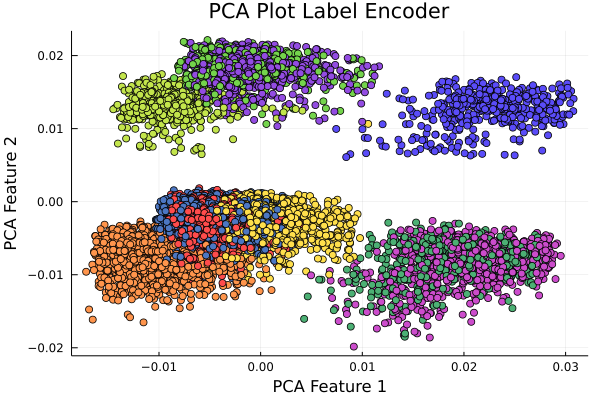

In [157]:
features = collect(Matrix(X_label)');
result = kmeans(features, clusters);

scatter(df_pca_label.x1, df_pca_label.x2, marker_z=result.assignments, title = "PCA Plot Label Encoder", color=:lightrainbow, legend=false)
xlabel!("PCA Feature 1")
ylabel!("PCA Feature 2")

In [158]:
nclusters(result) == clusters

true

In [159]:
a = assignments(result);
c = counts(result);
M = result.centers |> DataFrame;
println("Total Cost: ", result.totalcost);

Total Cost: 3.8796633427958094


In [160]:
distances = pairwise(SqEuclidean(), X_label');
println("Mean Silhouettes Score (Closer to 1 is better): ", mean(silhouettes(a, c, distances)));

Mean Silhouettes Score (Closer to 1 is better): 0.22556145762824198


In [161]:
sils = silhouettes(a, c, distances)
out_3_vals = sort(sils)[[1,2,3]];
out_3_ind = [];
for i = 1:1:3
    temp = findall(x->x==out_3_vals[i], sils)
    append!(out_3_ind, temp);
end
println("The top three outliers are rows: ", out_3_ind[1]," ",out_3_ind[2]," ",out_3_ind[3], " in the excel file")
println("They are part of clusters: ", a[out_3_ind][1]," ",a[out_3_ind][1], " ",a[out_3_ind][3],  " respectively");

The top three outliers are rows: 6811 7691 5734 in the excel file
They are part of clusters: 8 8 8 respectively


In [162]:
println("The outlier data in the corresponding rows") 
show(df_label[out_3_ind, :])
println() 

The outlier data in the corresponding rows
3×27 DataFrame
 Row │ tumorsize  co2      pain   wound  mobility  ntumors  nmorphine  remissi ⋯
     │ Float64    Float64  Int64  Int64  Int64     Int64    Int64      Int64   ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │   66.1677  1.80908      6      7         6        1          2          ⋯
   2 │   65.7242  1.56738      6      5         5        2          5
   3 │   62.3507  1.52298      4      4         6        4          3
                                                              20 columns omitted


## K-medoids

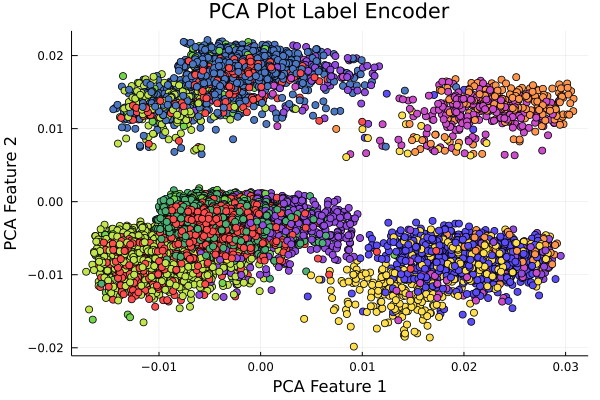

In [205]:
R = pairwise(Euclidean(),X_label, dims=1);
features = collect(Matrix(R)');
result = kmedoids(features, clusters);

scatter(df_pca_label.x1, df_pca_label.x2, marker_z=result.assignments, title = "PCA Plot Label Encoder", color=:lightrainbow, legend=false)
xlabel!("PCA Feature 1")
ylabel!("PCA Feature 2")

In [206]:
nclusters(result) == clusters

true

In [207]:
a = assignments(result);
c = counts(result);
println("Total Cost: ", result.totalcost);

Total Cost: 208.30796933128804


In [208]:
distances = pairwise(SqEuclidean(), X_label');
println("Mean Silhouettes Score (Closer to 1 is better): ", mean(silhouettes(a, c, distances)));

Mean Silhouettes Score (Closer to 1 is better): 0.13688656521902035


In [209]:
sils = silhouettes(a, c, distances)
out_3_vals = sort(sils)[[1,2,3]];
out_3_ind = [];
for i = 1:1:3
    temp = findall(x->x==out_3_vals[i], sils)
    append!(out_3_ind, temp);
end
println("The top three outliers are rows: ", out_3_ind[1]," ",out_3_ind[2]," ",out_3_ind[3], " in the excel file")
println("They are part of clusters: ", a[out_3_ind][1]," ",a[out_3_ind][1], " ",a[out_3_ind][3],  " respectively");

The top three outliers are rows: 4041 6222 3423 in the excel file
They are part of clusters: 8 8 2 respectively


In [210]:
println("The outlier data in their respective order") 
show(df_label[out_3_ind, :])
println() 

The outlier data in their respective order
3×27 DataFrame
 Row │ tumorsize  co2      pain   wound  mobility  ntumors  nmorphine  remissi ⋯
     │ Float64    Float64  Int64  Int64  Int64     Int64    Int64      Int64   ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │  106.411   1.75457      7      7         8        6          0          ⋯
   2 │   78.1211  1.54484      7      6         8        4          6
   3 │   68.5266  1.66891      7      5         7        3          7
                                                              20 columns omitted


## Affinity Propagation

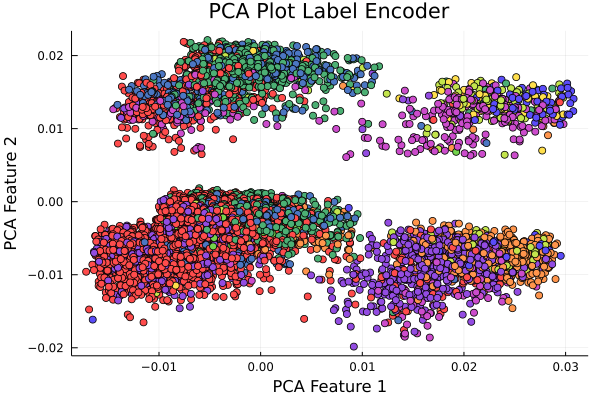

In [222]:
R = pairwise(Euclidean(),X_label, dims=1);
features = collect(Matrix(R)');
result = affinityprop(features);

scatter(df_pca_label.x1, df_pca_label.x2, marker_z=result.assignments, title = "PCA Plot Label Encoder", color=:lightrainbow, legend=false)
xlabel!("PCA Feature 1")
ylabel!("PCA Feature 2")

In [223]:
nclusters(result) == clusters

true

In [226]:
a = assignments(result);
c = counts(result);
println("Converged: ", result.converged);

Converged: true


In [227]:
distances = pairwise(SqEuclidean(), X_label');
println("Mean Silhouettes Score (Closer to 1 is better): ", mean(silhouettes(a, c, distances)));

Mean Silhouettes Score (Closer to 1 is better): 0.04077628653898096


In [228]:
sils = silhouettes(a, c, distances)
out_3_vals = sort(sils)[[1,2,3]];
out_3_ind = [];
for i = 1:1:3
    temp = findall(x->x==out_3_vals[i], sils)
    append!(out_3_ind, temp);
end
println("The top three outliers are rows: ", out_3_ind[1]," ",out_3_ind[2]," ",out_3_ind[3], " in the excel file")
println("They are part of clusters: ", a[out_3_ind][1]," ",a[out_3_ind][1], " ",a[out_3_ind][3],  " respectively");

The top three outliers are rows: 6605 913 5214 in the excel file
They are part of clusters: 6 6 3 respectively


In [250]:
R = pairwise(Euclidean(),X_label, dims=1);
features = collect(Matrix(X_label)');
result = fuzzy_cmeans(features, 10, 10)

# scatter(df_pca_label.x1, df_pca_label.x2, marker_z=result.assignments, title = "PCA Plot Label Encoder", color=:lightrainbow, legend=false)
# xlabel!("PCA Feature 1")
# ylabel!("PCA Feature 2")

FuzzyCMeansResult: 10 clusters for 8525 points in 27 dimensions (converged in 4 iterations)

In [251]:
nclusters(result) == clusters

true

In [252]:
println("Converged: ", result.converged);

Converged: true


In [253]:
distances = pairwise(SqEuclidean(), X_label');
println("Mean Silhouettes Score (Closer to 1 is better): ", mean(silhouettes(a, c, distances)));

Mean Silhouettes Score (Closer to 1 is better): 0.04077628653898096


In [254]:
sils = silhouettes(a, c, distances)
out_3_vals = sort(sils)[[1,2,3]];
out_3_ind = [];
for i = 1:1:3
    temp = findall(x->x==out_3_vals[i], sils)
    append!(out_3_ind, temp);
end
println("The top three outliers are rows: ", out_3_ind[1]," ",out_3_ind[2]," ",out_3_ind[3], " in the excel file")
println("They are part of clusters: ", a[out_3_ind][1]," ",a[out_3_ind][1], " ",a[out_3_ind][3],  " respectively");

The top three outliers are rows: 6605 913 5214 in the excel file
They are part of clusters: 6 6 3 respectively
